In [ ]:
import nltk
from nltk.corpus import gutenberg
nltk.download('gutenberg')
nltk.download('punkt')
import pickle
from nltk.tokenize import sent_tokenize, word_tokenize
import matplotlib.pyplot as plt

##1. Implement BPE Algorithm
Develop a Python implementation of the Byte Pair Encoding (BPE) algorithm, covering key
steps such as learning byte pair merges and encoding/decoding using the learned merge
operations

In [ ]:
class BPE:
  def __init__(self,corpus,num_merges):
    self.corpus = corpus
    self.num_merges = num_merges
    self.vocab = []
    self.pair_strt_idx = 0
    self.vocab_len_history = []
    self.freq_of_pair_merges = []

  def findMostFrequentPair(self, training_corpus):
    pair_freq = dict()
    for i in range(len(training_corpus)-1):
      pair = training_corpus[i] + training_corpus[i+1]
      if pair in pair_freq:
        pair_freq[pair] += 1
      else:
        pair_freq[pair] = 1

    chosen_pair = max(pair_freq, key=pair_freq.get)
    chosen_pair_freq = pair_freq[chosen_pair]
    #print(f'Pair Freqs: {pair_freq} & Pair Chosen: {chosen_pair}, Its Freq: {chosen_pair_freq}')
    self.freq_of_pair_merges.append(chosen_pair_freq)
    return chosen_pair

  def learner(self):
    training_corpus = list(self.corpus)
    self.vocab.extend(set(training_corpus))
    self.pair_strt_idx = len(self.vocab)
    self.vocab_len_history.append(len(self.vocab))

    for i in range(self.num_merges):
      most_freq_pair = self.findMostFrequentPair(training_corpus)
      self.vocab.append(most_freq_pair)
      self.vocab_len_history.append(len(self.vocab))

      new_training_corpus = []
      j = 0
      while(j <= len(training_corpus)-1):
        if j == len(training_corpus)-1:
          new_training_corpus.append(training_corpus[j])
          break
        elif training_corpus[j] + training_corpus[j+1] == most_freq_pair:
          new_training_corpus.append(most_freq_pair)
          j += 2
        else:
          new_training_corpus.append(training_corpus[j])
          j += 1

      training_corpus = new_training_corpus

  def segmenter(self,txt):
    test_corpus = list(txt)
    for pair in self.vocab[self.pair_strt_idx:]:
      j = 0
      new_test_corpus = []

      while(j <= len(test_corpus)-1):
        if j == len(test_corpus)-1:
          new_test_corpus.append(test_corpus[j])
          break
        elif test_corpus[j] + test_corpus[j+1] == pair:
          new_test_corpus.append(pair)
          j += 2
        else:
          new_test_corpus.append(test_corpus[j])
          j += 1

      test_corpus = new_test_corpus

    return test_corpus

In [ ]:
text = "thecatatethemate" #the cat ate the mate

bpe = BPE(text, 4)
bpe.learner()
print('Vocab: ',bpe.vocab)

bpe.segmenter('themated') # Ans shud be: the m ate d

Vocab:  ['h', 't', 'c', 'a', 'm', 'e', 'at', 'th', 'the', 'ate']


['the', 'm', 'ate', 'd']

In [ ]:
text = "low low low low low lowest lowest newer newer newer newer newer newer wider wider wider new new"
bpe = BPE(text, 8)
bpe.learner()
bpe.vocab # Freq of both <spc>low and newer<spc> is 6

Pair Freqs: {'lo': 7, 'ow': 7, 'w ': 6, ' l': 6, 'we': 8, 'es': 2, 'st': 2, 't ': 2, ' n': 8, 'ne': 8, 'ew': 8, 'er': 9, 'r ': 9, ' w': 3, 'wi': 3, 'id': 3, 'de': 3} & Pair Chosen: er, Its Freq: 9
Pair Freqs: {'lo': 7, 'ow': 7, 'w ': 6, ' l': 6, 'we': 2, 'es': 2, 'st': 2, 't ': 2, ' n': 8, 'ne': 8, 'ew': 8, 'wer': 6, 'er ': 9, ' w': 3, 'wi': 3, 'id': 3, 'der': 3} & Pair Chosen: er , Its Freq: 9
Pair Freqs: {'lo': 7, 'ow': 7, 'w ': 6, ' l': 6, 'we': 2, 'es': 2, 'st': 2, 't ': 2, ' n': 2, 'ne': 8, 'ew': 8, 'wer ': 6, 'er n': 6, 'er w': 3, 'wi': 3, 'id': 3, 'der ': 3} & Pair Chosen: ne, Its Freq: 8
Pair Freqs: {'lo': 7, 'ow': 7, 'w ': 6, ' l': 6, 'we': 2, 'es': 2, 'st': 2, 't ': 2, ' ne': 2, 'new': 8, 'wer ': 6, 'er ne': 6, 'er w': 3, 'wi': 3, 'id': 3, 'der ': 3} & Pair Chosen: new, Its Freq: 8
Pair Freqs: {'lo': 7, 'ow': 7, 'w ': 5, ' l': 6, 'we': 2, 'es': 2, 'st': 2, 't ': 2, ' new': 2, 'newer ': 6, 'er new': 6, 'er w': 3, 'wi': 3, 'id': 3, 'der ': 3, 'new ': 1} & Pair Chosen: lo, Its F

['w',
 'n',
 't',
 'l',
 'i',
 's',
 ' ',
 'o',
 'd',
 'r',
 'e',
 'er',
 'er ',
 'ne',
 'new',
 'lo',
 'low',
 ' low',
 'newer ']

##2. Train on NLTK Dataset (3 marks):
Utilize NLTK's Gutenberg Corpus, selecting books like "austen-emma.txt," "blake-poems.txt"
and "shakespeare-hamlet.txt" for training the BPE algorithm. Create a vocabulary based on
the training

In [ ]:
emma_text = gutenberg.raw('austen-emma.txt')
poem_text = gutenberg.raw('blake-poems.txt')
hamlet_text = gutenberg.raw('shakespeare-hamlet.txt')

bpe_austen_emma = BPE(emma_text, 1000)
bpe_blake_poem = BPE(poem_text, 1000)
bpe_shakespeare_hamlet = BPE(hamlet_text, 1000)

bpe_austen_emma.learner()
bpe_blake_poem.learner()
bpe_shakespeare_hamlet.learner()

In [ ]:
bpe_austen_emma.vocab[bpe_austen_emma.pair_strt_idx:bpe_austen_emma.pair_strt_idx+200]

['e ',
 't ',
 'th',
 'd ',
 'er',
 'in',
 's ',
 'an',
 ', ',
 'y ',
 'ou',
 'o ',
 'on',
 'en',
 'ing',
 'ha',
 'to ',
 'or',
 'f ',
 'ar',
 '. ',
 'the ',
 'and ',
 'er ',
 're',
 'll',
 'of ',
 'he ',
 'ing ',
 'as ',
 'ed ',
 'no',
 'a ',
 'hi',
 'es',
 '--',
 'I ',
 'ti',
 '.  ',
 'om',
 'at ',
 'be',
 'se',
 'it',
 '\n\n',
 'gh',
 'wi',
 ',\n',
 'le',
 'ch',
 'in ',
 'you',
 'on ',
 'for',
 'was ',
 'll ',
 'is',
 'ld ',
 'ver',
 'not ',
 'su',
 've ',
 'her ',
 'at',
 'en ',
 'Mr',
 'ri',
 'ould ',
 'be ',
 'al',
 'ly ',
 'ed',
 'it ',
 '; ',
 'that ',
 'she ',
 'ow',
 'de',
 'is ',
 'sa',
 'as',
 'ch ',
 'very ',
 'had ',
 'ut ',
 'us',
 'with',
 'ma',
 'ir',
 '\n\n"',
 'an ',
 'li',
 ', and ',
 'oo',
 'the',
 'le ',
 '.\n',
 'you ',
 'her',
 'for ',
 'have ',
 'he',
 'm ',
 'st',
 '."',
 'ce',
 'Mr. ',
 'his ',
 'k ',
 'with ',
 'but ',
 'ab',
 'ur',
 'os',
 'me',
 'com',
 'igh',
 'ne',
 'ther',
 'con',
 'fe',
 'ent',
 'ag',
 'ac',
 'pp',
 'un',
 'ro',
 'qu',
 'all',
 'ad',
 

In [ ]:
# with open('bpe_austen_emma.pkl', 'wb') as f:
#   pickle.dump(bpe_austen_emma, f)
# with open('bpe_blake_poem.pkl', 'wb') as f:
#   pickle.dump(bpe_blake_poem, f)
# with open('bpe_shakespeare_hamlet.pkl', 'wb') as f:
#   pickle.dump(bpe_shakespeare_hamlet, f)

##3. Test on NLTK Dataset
Evaluate the BPE algorithm on a separate set of books from the NLTK Gutenberg Corpus,
such as "Frankenstein," "Dracula," and "The Adventures of Sherlock Holmes." Measure
tokenization accuracy, coverage, and other relevant metrics

In [ ]:
book_list = gutenberg.fileids()
print("Available Books:")
for book in book_list:
  print(book)

Available Books:
austen-emma.txt
austen-persuasion.txt
austen-sense.txt
bible-kjv.txt
blake-poems.txt
bryant-stories.txt
burgess-busterbrown.txt
carroll-alice.txt
chesterton-ball.txt
chesterton-brown.txt
chesterton-thursday.txt
edgeworth-parents.txt
melville-moby_dick.txt
milton-paradise.txt
shakespeare-caesar.txt
shakespeare-hamlet.txt
shakespeare-macbeth.txt
whitman-leaves.txt


In [ ]:
macbeth_text = gutenberg.raw('shakespeare-macbeth.txt') # Shakespeare
persuation_text = gutenberg.raw('austen-persuasion.txt') # Jane Austen
whitman_text = gutenberg.raw('whitman-leaves.txt') # Poem

##4. Create Reference Tokenization (2 marks):
Use NLTK's punkt tokenizer to create a reference tokenization for the test dataset. Save the
tokenized results in a structured format for later comparison.

In [ ]:
def tokenize_text(text):
    sentences = sent_tokenize(text)  # Tokenize into sentences
    tokens = [word for sent in sentences for word in word_tokenize(sent)]  # Flatten tokenized words into a single list
    return tokens

# Tokenize the texts
macbeth_tokens = tokenize_text(macbeth_text)
persuasion_tokens = tokenize_text(persuation_text)
whitman_tokens = tokenize_text(whitman_text)

##5. Compare with Standard Tokenization (2 marks):
Implement a baseline tokenization using NLTK's default method (e.g., word_tokenize) on
the test dataset. Compare the BPE algorithm's performance with the standard tokenization
in terms of accuracy, coverage, and other relevant metrics

In [ ]:
def accuracy(learned_tokens,ref_tokens):
  learned_tokens_lower = [token.lower() for token in learned_tokens]
  ref_tokens_lower = [token.lower() for token in ref_tokens]
  learned_tokens_lower_set = set(learned_tokens_lower)
  num_correctly_tokenized = 0

  for i in range(len(ref_tokens_lower)):
    if ref_tokens_lower[i] in learned_tokens_lower_set:
      num_correctly_tokenized += 1

  accuracy = num_correctly_tokenized / len(ref_tokens_lower)
  return accuracy*100

In [ ]:
def coverage(learned_tokens,ref_tokens):
  learned_tokens_lower = [token.lower() for token in learned_tokens]
  ref_tokens_lower = [token.lower() for token in ref_tokens]
  num_learned_tokens_lower_set = len(set(learned_tokens_lower))
  num_ref_tokens_lower_set = len(set(ref_tokens_lower))

  return (num_learned_tokens_lower_set / num_ref_tokens_lower_set)*100

In [ ]:
def prf(learned_tokens,ref_tokens):
  learned_tokens_lower = [token.lower() for token in learned_tokens]
  ref_tokens_lower = [token.lower() for token in ref_tokens]
  learned_tokens_lower_set = set(learned_tokens_lower)
  ref_tokens_lower_set = set(ref_tokens_lower)

  true_positives = len(ref_tokens_lower_set.intersection(learned_tokens_lower_set))
  false_positives = len(learned_tokens_lower_set.difference(ref_tokens_lower_set))
  false_negatives = len(ref_tokens_lower_set.difference(learned_tokens_lower_set))

  precision = true_positives / (true_positives + false_positives)
  recall = true_positives / (true_positives + false_negatives)
  f1_score = 2 * (precision * recall) / (precision + recall)

  return precision, recall, f1_score

In [ ]:
def jaccard_sim(learned_tokens,ref_tokens):
  learned_tokens_lower = [token.lower() for token in learned_tokens]
  ref_tokens_lower = [token.lower() for token in ref_tokens]
  learned_tokens_lower_set = set(learned_tokens_lower)
  ref_tokens_lower_set = set(ref_tokens_lower)

  intersection = len(learned_tokens_lower_set.intersection(ref_tokens_lower_set))
  union = len(learned_tokens_lower_set.union(ref_tokens_lower_set))
  jaccard_sim = intersection / union

  return jaccard_sim

###Performance of bpe_austen_emma

In [ ]:
learned_persuation_tokens = bpe_austen_emma.segmenter(persuation_text)

In [ ]:
accuracy(learned_persuation_tokens,persuasion_tokens)

52.279458322269655

In [ ]:
coverage(learned_persuation_tokens,persuasion_tokens)

16.47316170284368

In [ ]:
prf(learned_persuation_tokens,persuasion_tokens)

(0.17058222676200205, 0.028100286050816086, 0.048251950303380524)

In [ ]:
jaccard_sim(learned_persuation_tokens,persuasion_tokens)

0.02472242783123612

###Performance of bpe_blake_poem

In [ ]:
learned_whitman_tokens = bpe_blake_poem.segmenter(whitman_text)

In [ ]:
print(f'Accuracy: {accuracy(learned_whitman_tokens,whitman_tokens)}')
print(f'Coverage: {coverage(learned_whitman_tokens,whitman_tokens)}')
print(prf(learned_whitman_tokens,whitman_tokens))
print(f'Jaccard Sim: {jaccard_sim(learned_whitman_tokens,whitman_tokens)}')

Accuracy: 44.94741992345896
Coverage: 6.10714805648566
(0.20381406436233612, 0.012447226670548843, 0.02346161761679358)
Jaccard Sim: 0.011870054144106622


###Performance of bpe_shakespeare_hamlet

In [ ]:
learned_macbeth_tokens = bpe_shakespeare_hamlet.segmenter(macbeth_text)

In [ ]:
print(f'Accuracy: {accuracy(learned_macbeth_tokens,macbeth_tokens)}')
print(f'Coverage: {coverage(learned_macbeth_tokens,macbeth_tokens)}')
print(prf(learned_macbeth_tokens,macbeth_tokens))
print(f'Jaccard Sim: {jaccard_sim(learned_macbeth_tokens,macbeth_tokens)}')

Accuracy: 40.673773219988306
Coverage: 24.53573438379291
(0.1536697247706422, 0.037703995498030385, 0.060551287844554894)
Jaccard Sim: 0.031220876048462257


##6. Visualizations (2 marks):
Provide visualizations of the BPE algorithm's learning process, illustrating the evolution of
the vocabulary and the frequency of byte pair merges. Compare the vocabulary before and
after training

In [ ]:
bpe_blake_poem_viz = BPE(poem_text, 1000)
bpe_blake_poem_viz.learner()

In [ ]:
bpe_blake_poem_viz.vocab_len_history.pop(0)
len(bpe_blake_poem_viz.vocab_len_history)

1000

In [ ]:
len(bpe_blake_poem_viz.freq_of_pair_merges)

1000

In [ ]:
bpe_blake_poem_viz.vocab_len_history[:10]

[74, 75, 76, 77, 78, 79, 80, 81, 82, 83]

In [ ]:
bpe_blake_poem_viz.freq_of_pair_merges[:10]

[1240, 1005, 839, 660, 591, 472, 431, 426, 406, 387]

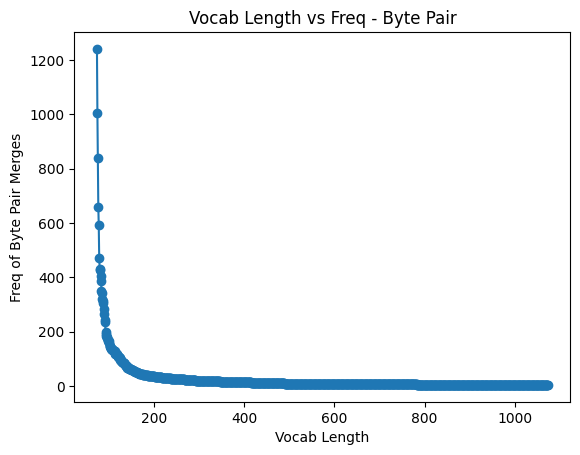

In [ ]:
plt.plot(bpe_blake_poem_viz.vocab_len_history, bpe_blake_poem_viz.freq_of_pair_merges, marker='o')

# Add labels and title
plt.xlabel('Vocab Length')
plt.ylabel('Freq of Byte Pair Merges')
plt.title('Vocab Length vs Freq - Byte Pair')

# Show the plot
plt.show()

##7. Report and Discussion (3 marks):
Prepare a detailed report documenting the implementation, experimental setup, and results.
Discuss the strengths and weaknesses of BPE, and compare it with standard tokenization
methods.
Address any challenges encountered during implementation and suggest potential
improvements

###Implementation
My implementation of Byte Pair Encoding (BPE) consist of a python class with 2 main functions learner and segmenter, and a helper function to find most frequent pair to merge. Learner function learns the vocabulary of corpus it is initialized with. The learning process is halted after a certain number of pairs are reached (num_merges). Segmenter function breaks corpus into characters and runs each merge learned from training data greedily, in the order the merges are learned.
###Experimental Setup
I instantiated 3 instances of byte pair encoders initializing them with 3 corpus: "austen-emma.txt," "blake-poems.txt" and "shakespeare-hamlet.txt" for training. For testing, I selected a poem corpus, whitman leaves, a Jane Austen corpus - Persuasion and a Shakespeare corpus - Macbeth. Idea is to evaluate performance of BPE trained on a author's book on another book written by same author.
###Result
Kindly refer Section 5 subsections:<br>
1) Performance of bpe_austen_emma<br>
2) Performance of bpe_blake_poem<br>
3) Performance of bpe_shakespeare_hamlet<br>

Also refer section 6 where I visualize learning process of my implementation of BPE on Blake's poem. I plotted Freq of Most Freq Byte Pair with Vocab Length and got an elbow-like plot which could mean that vocab size (number of byte pairs learned) of 200 is optimal for this corpus.

###Strength of BPE
From my observations:
1) BPE is able to learn morphemes<br>
2) It also learns freqent words<br>
3) Also learns frequent subwords<br>
###Weaknesses of BPE
1) Loss of Word Semantics: BPE may break words into subword units that lose their semantic meaning<br>
2) BPE relies on a predefined vocabulary size, and if the vocabulary is too small, it may produce subwords that are too small and less meaningful. If it's too large, it may overfit to rare words or miss the generalizability of subword units<br>
###BPE vs Standard Tokenization Methods
1) Out-of-Vocabulary Handling: BPE is	Good, breaks down into subwords. Punkt tokenization is Poor, treats rare words as-is<br>
2) Language Independence: BPE is Language-independent	, Punkt is Language-specific<br>
3) Semantic Meaning: In BPE there is potential loss of meaning but Punkt Preserves word meaning<br>
4) Context Sensitivity: BPE is Context-insensitive but Punkt does	Rule-based context handling<br>
###Challenges
1) Context-Agnostic Tokenization: BPE doesn't take the context of a word into account, leading to inefficient or unintuitive splits, especially for homographs (e.g., "lead" as a verb vs. "lead" as a metal).<br>
####Potential Improvements:<br>
Contextualized Tokenization: Incorporate a context-aware mechanism, allowing BPE to adapt tokenization based on sentence-level meaning. A hybrid model combining BPE with neural models (like BERT’s WordPiece tokenization) could address this issue.<br>

2) Slow Processing Speed: BPE can be slow, particularly when building the subword vocabulary or applying it to large corpora. The repeated merging of frequent byte pairs requires multiple passes over the text, which can be computationally expensive.
####Potential Improvements:<br>
Parallelization: Implement BPE in parallel or distributed computing environments to speed up the subword merging process.